In [1]:
%load_ext autoreload

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras

In [13]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
DATASET_PATH = os.path.join(BASE_PATH, "datasets")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [14]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [18]:
from tf_al import ExperimentSuitMetrics
from tf_al.wrapper import McDropout
from models import setup_growth, fchollet_cnn
from data import BenchmarkData, DataSetType
from utils import MetricsTransformer

In [16]:
BABA_METRICS = os.path.join(METRICS_PATH, "baba_test")

In [17]:
metrics_handler = ExperimentSuitMetrics(BABA_METRICS)

In [27]:
dtypes = {
    "unlabeled_pool_size": int,
    "labeled_pool_size": int,
    "query_time": float,
    "train_time": float,
    "eval_categorical_crossentropy": float,
    "eval_categorical_accuracy": float
}
df_baba = MetricsTransformer.load("0_841312_mc_dropout_baba.csv", metrics_handler, dtype=dtypes)
df_random = MetricsTransformer.load("0_841312_mc_dropout_random", metrics_handler, dtype=dtypes)

In [28]:
df_baba.columns

Index(['train_loss', 'train_categorical_accuracy', 'train_time', 'query_time',
       'eval_categorical_crossentropy', 'eval_categorical_accuracy',
       'eval_time', 'indices_selected', 'iteration', 'labeled_pool_size',
       'unlabeled_pool_size'],
      dtype='object')

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_categorical_accuracy'>

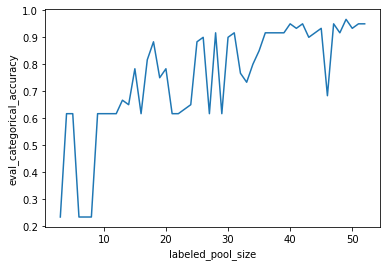

In [30]:
sns.lineplot(data=df_random, x="labeled_pool_size", y="eval_categorical_accuracy")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_categorical_accuracy'>

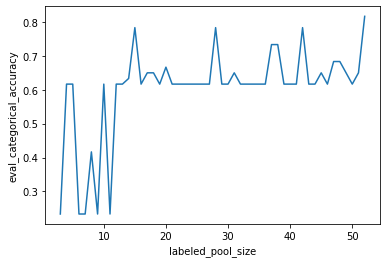

In [29]:
sns.lineplot(data=df_baba, x="labeled_pool_size", y="eval_categorical_accuracy")